# WRF 10/21 cleanup audit

We need to free up some space on `/rcs/` which is used for post-processing the 20km WRF data. So we want to remove redundant data but it is not clear what files are actually redundant. This notebook is to be used for auditing all data in `/rcs/`. 

Note - since we will be removing and re-organizing these files eventually, the code in this notebook will likely go stale. It will simply serve as a record of the current state of things prior to the 10/21 cleanup.

## Data folders

There are two folders in `/rcs/project_data/` that hold the bulk of the data: `wrf_data/` and `WRF_DATA_SEP2019`.

### `WRF_DATA_SEP2019/`

This folder is definitely incomplete. It seems to have all variables, but not all year/model combinations. This was seen while investigating the [wind issue](https://github.com/ua-snap/wrf_utils/blob/287e607684d10290eeee5b3ba4e2ea4e76577f1d/snap_wrf_data_prep/wind-issue/repair_winds_issue.ipynb). 

For most variables (potentially all) there seems to be ~35 years of CCSM RCP 8.5, 70 years of GFDL RCP 8.5, and sometimes 1 historical year from each GCM, and usually no ERA-Interim. Here are the files present for a few variables:

In [55]:
ls /rcs/project_data/WRF_DATA_SEP2019/acsnow

ACSNOW_wrf_hourly_ccsm_hist_1970.nc   ACSNOW_wrf_hourly_gfdl_rcp85_2023.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2005.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2024.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2006.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2025.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2007.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2026.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2008.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2027.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2009.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2028.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2010.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2029.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2011.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2030.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2012.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2031.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2013.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2032.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2014.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2033.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2015.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2034.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2016.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2035.nc
ACSNOW_wrf_hourly_ccsm_rc

In [58]:
ls /rcs/project_data/WRF_DATA_SEP2019/t

T_wrf_hourly_ccsm_hist_1970.nc   T_wrf_hourly_gfdl_rcp85_2023.nc
T_wrf_hourly_ccsm_rcp85_2005.nc  T_wrf_hourly_gfdl_rcp85_2024.nc
T_wrf_hourly_ccsm_rcp85_2006.nc  T_wrf_hourly_gfdl_rcp85_2025.nc
T_wrf_hourly_ccsm_rcp85_2007.nc  T_wrf_hourly_gfdl_rcp85_2026.nc
T_wrf_hourly_ccsm_rcp85_2008.nc  T_wrf_hourly_gfdl_rcp85_2027.nc
T_wrf_hourly_ccsm_rcp85_2009.nc  T_wrf_hourly_gfdl_rcp85_2028.nc
T_wrf_hourly_ccsm_rcp85_2010.nc  T_wrf_hourly_gfdl_rcp85_2029.nc
T_wrf_hourly_ccsm_rcp85_2011.nc  T_wrf_hourly_gfdl_rcp85_2030.nc
T_wrf_hourly_ccsm_rcp85_2012.nc  T_wrf_hourly_gfdl_rcp85_2031.nc
T_wrf_hourly_ccsm_rcp85_2013.nc  T_wrf_hourly_gfdl_rcp85_2032.nc
T_wrf_hourly_ccsm_rcp85_2014.nc  T_wrf_hourly_gfdl_rcp85_2033.nc
T_wrf_hourly_ccsm_rcp85_2015.nc  T_wrf_hourly_gfdl_rcp85_2034.nc
T_wrf_hourly_ccsm_rcp85_2016.nc  T_wrf_hourly_gfdl_rcp85_2035.nc
T_wrf_hourly_ccsm_rcp85_2017.nc  T_wrf_hourly_gfdl_rcp85_2036.nc
T_wrf_hourly_ccsm_rcp85_2018.nc  T_wrf_hourly_gfdl_rcp85_2037.nc
T_wrf_hourly_ccsm_rcp85_2

In [60]:
ls /rcs/project_data/WRF_DATA_SEP2019/pcpt

PCPT_wrf_hourly_ccsm_hist_1970.nc   PCPT_wrf_hourly_gfdl_rcp85_2023.nc
PCPT_wrf_hourly_ccsm_rcp85_2005.nc  PCPT_wrf_hourly_gfdl_rcp85_2024.nc
PCPT_wrf_hourly_ccsm_rcp85_2006.nc  PCPT_wrf_hourly_gfdl_rcp85_2025.nc
PCPT_wrf_hourly_ccsm_rcp85_2007.nc  PCPT_wrf_hourly_gfdl_rcp85_2026.nc
PCPT_wrf_hourly_ccsm_rcp85_2008.nc  PCPT_wrf_hourly_gfdl_rcp85_2027.nc
PCPT_wrf_hourly_ccsm_rcp85_2009.nc  PCPT_wrf_hourly_gfdl_rcp85_2028.nc
PCPT_wrf_hourly_ccsm_rcp85_2010.nc  PCPT_wrf_hourly_gfdl_rcp85_2029.nc
PCPT_wrf_hourly_ccsm_rcp85_2011.nc  PCPT_wrf_hourly_gfdl_rcp85_2030.nc
PCPT_wrf_hourly_ccsm_rcp85_2012.nc  PCPT_wrf_hourly_gfdl_rcp85_2031.nc
PCPT_wrf_hourly_ccsm_rcp85_2013.nc  PCPT_wrf_hourly_gfdl_rcp85_2032.nc
PCPT_wrf_hourly_ccsm_rcp85_2014.nc  PCPT_wrf_hourly_gfdl_rcp85_2033.nc
PCPT_wrf_hourly_ccsm_rcp85_2015.nc  PCPT_wrf_hourly_gfdl_rcp85_2034.nc
PCPT_wrf_hourly_ccsm_rcp85_2016.nc  PCPT_wrf_hourly_gfdl_rcp85_2035.nc
PCPT_wrf_hourly_ccsm_rcp85_2017.nc  PCPT_wrf_hourly_gfdl_rcp85_2036.nc
PCPT_w

#### `hourly` / `hourly_fix`?

Another point of confusion is whether these data correspond to the re-stacked and un-"fixed" data, or the final post-processed product. According to the wind-repair notebook linked above, these data do indeed match data that has been restacked using the most recent version of the restacking code. This means they should correspond to the data in `/rcs/project_data/wrf_data/hourly/`, if *those* data were also restacked using the most recent code. So here is a check to see whether these data actually match the data in `/rcs/project_data/wrf_data/hourly/` for a variety of variable/year/model combinations:

In [109]:
import xarray as xr
import numpy as np
import itertools
from pathlib import Path

def compare_restacked_data(restacked_fp, original_fp, var, year, month=None, day=None):
    if month is None:
        month = str(np.random.randint(1, 12)).zfill(2)
    if day is None:
        day = str(np.random.randint(1, 28)).zfill(2)
        
    with xr.open_dataset(restacked_fp) as ds:
        restacked_arr = ds[var].sel(time=f"{year}-{month}-{day}T00:00:00").values

    with xr.open_dataset(original_fp) as ds:
        original_arr = ds[var].sel(time=f"{year}-{month}-{day}T00:00:00").values

    print("match:", np.all(original_arr == restacked_arr))


original_dir = Path("/rcs/project_data/wrf_data/hourly")
sep19_dir = Path("/rcs/project_data/WRF_DATA_SEP2019")

# some random variables (not wind on purpose because this 
# directory does not have them because of wind issue
variables = ["acsnow", "pcpt", "t2", "lwupb", "snow", "ght"]
models = ["ccsm", "gfdl"]
year = 2012

for var, model in itertools.product(variables, models):
    og_fp = list(original_dir.joinpath(var).glob(f"*{model}*{year}*"))[0]
    s19_fp = list(sep19_dir.joinpath(var).glob(f"*{model}*{year}*"))[0]
    print(f"Variable: {var}; Model: {model}", end="......")
    print("size:", s19_fp.stat().st_size == og_fp.stat().st_size, end="...")
    compare_restacked_data(s19_fp, og_fp, var.upper(), year)

Variable: acsnow; Model: ccsm......match: True
Variable: acsnow; Model: gfdl......match: True
Variable: pcpt; Model: ccsm......match: True
Variable: pcpt; Model: gfdl......match: True
Variable: t2; Model: ccsm......match: True
Variable: t2; Model: gfdl......match: True
Variable: lwupb; Model: ccsm......match: True
Variable: lwupb; Model: gfdl......match: True
Variable: snow; Model: ccsm......match: True
Variable: snow; Model: gfdl......match: True
Variable: ght; Model: ccsm......match: True
Variable: ght; Model: gfdl......match: True


This is somewhat unexpected, because according to the WRF wind repair efforts, the wind data in this folder were different from what was in `wrf_data/hourly`. Can't re-verify directly because those non-matchings files were cleaned out of there because they were assumed bad. But some were saved in `/rcs/project_data/wrf_data/wind-issue/incorrect_samples/hourly`. So compare with these data again to make sure:

In [145]:
bad_dir = Path("/rcs/project_data/wrf_data/wind-issue/incorrect_samples/hourly")

# some random variables (not wind on purpose because this 
# directory does not have them because of wind issue
variables = ["U10", "UBOT", "V10", "VBOT"]
models = ["ccsm", "gfdl"]
year = 2006

for var, model in itertools.product(variables, models):
    bad_fp = list(bad_dir.glob(f"*{var.upper()}*{model}*{year}*"))[0]
    s19_fp = list(sep19_dir.joinpath(var).glob(f"*{var.upper()}*{model}*{year}*"))[0]
    print(f"Variable: {var}; Model: {model}", end="......")
    print("size:", s19_fp.stat().st_size == bad_fp.stat().st_size, end="...")
    compare_restacked_data(s19_fp, bad_fp, var.upper(), year)

Variable: U10; Model: ccsm......size: False...match: False
Variable: U10; Model: gfdl......size: False...match: False
Variable: UBOT; Model: ccsm......size: False...match: False
Variable: UBOT; Model: gfdl......size: False...match: False
Variable: V10; Model: ccsm......size: False...match: False
Variable: V10; Model: gfdl......size: False...match: False
Variable: VBOT; Model: ccsm......size: False...match: False
Variable: VBOT; Model: gfdl......size: False...match: False


Okay so it looks like the wind variables don't match but potentially other variables do. 

This means we should verify that all non-wind variables in `/rcs/project_data/wrf_data/hourly/` match what's in `WRF_DATA_SEP2019`. We will do so by checking that filesizes match between all files:

In [342]:
from multiprocessing import Pool
import time

def compare_files(fp, seed, search_dir=original_dir):
    """Lookup a file with same name as fp in 
    search_dir and compare sizes, and whether
    file values for a random time slice are the same.
    """
    test_fp = Path(search_dir.joinpath(f"{fp.parent.name}/{fp.name}"))
    var = fp.parent.name
    year = fp.name.split("_")[-1].split(".")[0]
    local_state = np.random.RandomState(seed)
    month = str(local_state.randint(1, 12)).zfill(2)
    day = str(local_state.randint(1, 28)).zfill(2)
    
    if test_fp.exists():
        size_result = test_fp.stat().st_size == fp.stat().st_size
        try:
            with xr.open_dataset(fp) as ds1:
                arr1 = ds1[var.upper()].sel(time=f"{year}-{month}-{day}T00:00:00", x=slice(100, 150), y=slice(100, 150)).values
            bad_fp = False
        except OSError:
            bad_fp = fp
        except KeyError:
            bad_fp = f"{fp} TYPE 2"
            
        try:
            with xr.open_dataset(test_fp) as ds2:
                arr2 = ds2[var.upper()].sel(time=f"{year}-{month}-{day}T00:00:00", x=slice(100, 150), y=slice(100, 150)).values
            bad_test_fp = False
        except OSError:
            bad_test_fp = test_fp
        except KeyError:
            bad_test_fp = f"{test_fp} TYPE 2"
        
        if (not bad_fp) & (not bad_test_fp):
            arr_result = np.all(np.isclose(arr1, arr2))
        else:
            arr_result = f"bad fp: {bad_fp}. Bad test fp: {bad_test_fp}"
    else:
        size_result = None
        arr_result = None
    
    return {
        "fp": fp.name, 
        "variable": fp.parent.name, 
        "year": year, 
        "month": month, 
        "day": day, 
        "size_result": size_result, 
        "arr_result": arr_result
    }
    

# get all files in WRF_DATA_SEP2019
s19_fps = list(sep19_dir.glob("*/*.nc"))

args = list(zip(s19_fps, np.arange(len(s19_fps))))

tic = time.perf_counter()

# commented out to resume from 2575
#results = []
for arg in args[2575:]:
    results.append(compare_files(*arg))

print(f"Done, {round((time.perf_counter() - tic) / 60, 1)}m")

Done, 64.7m


In [311]:
ds = xr.open_dataset("/rcs/project_data/wrf_data/hourly/ght/GHT_wrf_hourly_ccsm_rcp85_2040.nc")

In [325]:
ds = xr.open_dataset("/rcs/project_data/WRF_DATA_SEP2019/ght/GHT_wrf_hourly_ccsm_rcp85_2040.nc")

In [343]:
result_df = pd.DataFrame(results)

In [347]:
result_df[type(result_df["arr_result"] == ]

False

In [348]:
type("t")

str

In [352]:
!aws s3 ls wrf-ak-ar5

/bin/bash: aws: command not found


In [354]:
def get_var_usage(fp_size):
    """Estimate disk usage for WRF variable
    based on 36 historical years of ERA, GFDL, and CCSM,
    and 95 future years of GFDL and CCSM, from the filesize in GB
    """
    return ((37 * fp_size * 3) + (2 * 95 * fp_size))

sizes_di = {
    "acsnow": .315, 
    "albedo": .3, 
    "canwat": .2, 
    "cldfra_high": .3, 
    "cldfra_low": .65, 
    "cldfra_mid": .35, 
    "cldfra": 0.9, 
    "ght": 13.2,
    "hfx": .75, 
    "lh": .75, 
    "lwdnb": 1.1,
    "lwdnbc": 0.92, 
    "lwupb": 0.9, 
    "lwupbc": 0.85, 
    "omega": 24, 
    "pcpc": 0.2, 
    "pcpnc": 0.6, 
    "pcpt": 0.7, 
    "potevp": 0.55, 
    "psfc": 0.85, 
    "q2": 1.5, 
    "qbot": 1.5, 
    "qvapor": 18, 
    "seaice": 0.01, 
    "sh2o": 0.83, 
    "slp": 1, 
    "smois": 0.57, 
    "snow": 0.37, 
    "snowc": 0.06, 
    "snowh": 0.53, 
    "swdnb": 0.6, 
    "swdnbc": 0.45, 
    "swupb": 0.57, 
    "swupbc": 0.44, 
    "t": 13.5, 
    "t2": 1.1, 
    "tbot": 1.1, 
    "tsk": 1, 
    "tslb": 2.6, 
    "u": 21.2, 
    "u10": 1.7,
    "ubot": 1.7, 
    "v": 21.7, 
    "v10": 1.7, 
    "vbot": 1.7, 
    "vegfra": 0.03
}

total_sizes = [get_var_usage(size) for size in sizes_di.values()]

In [357]:
np.sum(total_sizes)

43297.34499999999

In [360]:
get_var_usage(21.2)

6381.2

In [272]:
fp = "/rcs/project_data/WRF_DATA_SEP2019/pcpnc/PCPNC_wrf_hourly_ccsm_rcp85_2013.nc"

ds = xr.open_dataset(fp)

In [269]:
ncdump /rcs/project_data/wrf_data/hourly/pcpnc/PCPNC_wrf_hourly_ccsm_rcp85_2013.nc

-rw-rw----. 1 snap-smb dyndown 720059105 Mar  8  2019 /rcs/project_data/wrf_data/hourly/pcpnc/PCPNC_wrf_hourly_ccsm_rcp85_2013.nc


In [281]:
!du -sh /rcs/project_data/wrf_data/hourly_fix

21T	/rcs/project_data/wrf_data/hourly_fix


In [282]:
!du -sh /rcs/project_data/wrf_data/daily

50G	/rcs/project_data/wrf_data/daily


In [288]:
test = False
if test:
    print("test")

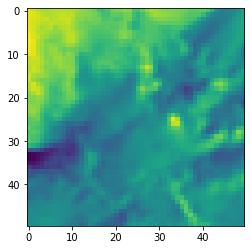

In [234]:
import matplotlib.pyplot as plt

plt.imshow(ds["U10"].sel(time="2006-01-01T00:00:00", x=slice(100, 150), y=slice(100, 150)).values)


In [245]:
np.random.RandomState(123456789)
np.random.randint(1, 12)

1

In [237]:
import pandas as pd

df = pd.DataFrame(out)

In [189]:
df[(df["result"] == False) & (df["variable"] == "acsnow")].iloc[0].fp

PosixPath('/rcs/project_data/WRF_DATA_SEP2019/acsnow/ACSNOW_wrf_hourly_gfdl_rcp85_2006.nc')

In [208]:
fp = Path("/rcs/project_data/WRF_DATA_SEP2019/acsnow/ACSNOW_wrf_hourly_gfdl_rcp85_2006.nc")
test_fp = Path("/rcs/project_data/wrf_data/hourly/acsnow/ACSNOW_wrf_hourly_gfdl_rcp85_2006.nc")

print(fp.stat().st_size)
print(test_fp.stat().st_size)

var = fp.parent.name
year = fp.name.split("_")[-1].split(".")[0]
month = "02"
day = "01"

with xr.open_dataset(fp) as ds1:
    with xr.open_dataset(test_fp) as ds2:
        arr1 = ds1[var.upper()].sel(time=f"{year}-{month}-{day}T00:00:00").values
        arr2 = ds2[var.upper()].sel(time=f"{year}-{month}-{day}T00:00:00").values
        
print("Arrays match:", np.all(np.isclose(arr1, arr2)))

331460614
331429953
Arrays match: True


In [206]:
arr1[69, 250]

0.10079999

In [207]:
arr2[69, 250]

0.1008

In [161]:
test_fp = Path('/rcs/project_data/wrf_data/hourly/albedo/ALBEDO_wrf_hourly_gfdl_rcp85_2006.nc')

In [162]:
test_fp.stat().st_size

301873358

In [164]:
fp = Path('/rcs/project_data/WRF_DATA_SEP2019/albedo/ALBEDO_wrf_hourly_gfdl_rcp85_2006.nc')
fp.stat().st_size

301908076

In [143]:
ls /rcs/project_data/wrf_data/hourly_fix/

acsnow/       lwupbc/     slp/          test-all-wrf-data-June2019.csv
albedo/       omega/      smois/        test-all-wrf-data-June2019_prepped.csv
canwat/       pcpc/       snow/         tsk/
cldfra/       pcpnc/      snowc/        tslb/
cldfra_high/  pcpt/       snowh/        u/
cldfra_low/   potevp/     swdnb/        u10/
cldfra_mid/   psfc/       swdnbc/       ubot/
ght/          q2/         swupb/        v/
hfx/          qbot/       swupbc/       v10/
lh/           qvapor/     sync_dirs.sh  vbot/
lwdnb/        README.txt  t/            vegfra/
lwdnbc/       seaice/     t2/
lwupb/        sh2o/       tbot/


In [130]:
ds.sel(time=f"{year}-{month}-{day}T00:00:00").values



<xarray.Dataset>
Dimensions:  (time: 8760, x: 262, y: 262)
Coordinates:
    lat      (x, y) float32 37.23 37.3 37.36 37.43 ... 66.14 65.96 65.78 65.6
    lon      (x, y) float32 -177.8 -177.6 -177.4 -177.3 ... -66.08 -66.05 -66.02
  * time     (time) datetime64[ns] 2006-01-01 ... 2006-12-31T23:00:00
Dimensions without coordinates: x, y
Data variables:
    U10      (time, x, y) float32 ...
Attributes:
    creation_date:    Sat May 13 13:02:24 AKDT 2017
    NCL_Version:      6.3.0
    system:           Linux n9 2.6.32-642.11.1.el6.686g0000.x86_64 #1 SMP Tue...
    Conventions:      None
    grib_source:      WRFDS_d01.2006-01-01_00.grib
    title:            NCL: convert-GRIB-to-netCDF
    reference_time:   2006-01-01 00:00:00
    proj_parameters:  +units=m +proj=stere +lat_ts=64.0 +lon_0=-152.0 +lat_0=...

In [106]:
day = "14"
month = "09"

with xr.open_dataset(og_fp) as ds1:
    with xr.open_dataset(s19_fp) as ds2:
        arr1 = ds1["T2"].sel(time=f"{year}-{month}-{day}T00:00:00").values
        arr2 = ds2["T2"].sel(time=f"{year}-{month}-{day}T00:00:00").values
        print("match:", np.all(arr1 == arr2))

match: True


In [125]:
ls /rcs/project_data/wrf_data/hourly/u

acsnow/                          lwupb/      sh2o/                tbot/
albedo/                          lwupbc/     slp/                 tsk/
canwat/                          omega/      smois/               tslb/
cldfra/                          pcpc/       snow/                u/
cldfra_high/                     pcpnc/      snowc/               u10/
cldfra_low/                      pcpt/       snowh/               ubot/
cldfra_mid/                      potevp/     swdnb/               v/
ght/                             psfc/       swdnbc/              v10/
hfx/                             q2/         swupb/               vbot/
history_move_files_keep_tmp.txt  qbot/       swupbc/              vegfra/
lh/                              qvapor/     sync_dirs_hourly.sh
lwdnb/                           README.txt  t/
lwdnbc/                          seaice/     t2/


In [49]:
ls /rcs/project_data/wrf_data/hourly_fix/acsnow/*ERA* | head -4

/rcs/project_data/wrf_data/hourly_fix/acsnow/acsnow_hourly_wrf_ERA-Interim_historical_1979.nc
/rcs/project_data/wrf_data/hourly_fix/acsnow/acsnow_hourly_wrf_ERA-Interim_historical_1980.nc
/rcs/project_data/wrf_data/hourly_fix/acsnow/acsnow_hourly_wrf_ERA-Interim_historical_1981.nc
/rcs/project_data/wrf_data/hourly_fix/acsnow/acsnow_hourly_wrf_ERA-Interim_historical_1982.nc


In [51]:
ls /rcs/project_data/wrf_data/hourly/acsnow/*era* | head -4

/rcs/project_data/wrf_data/hourly/acsnow/ACSNOW_wrf_hourly_era_interim_1979.nc
/rcs/project_data/wrf_data/hourly/acsnow/ACSNOW_wrf_hourly_era_interim_1980.nc
/rcs/project_data/wrf_data/hourly/acsnow/ACSNOW_wrf_hourly_era_interim_1981.nc
/rcs/project_data/wrf_data/hourly/acsnow/ACSNOW_wrf_hourly_era_interim_1982.nc


In [53]:
ls /rcs/project_data/WRF_DATA_SEP2019/acsnow

ACSNOW_wrf_hourly_ccsm_hist_1970.nc   ACSNOW_wrf_hourly_gfdl_rcp85_2023.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2005.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2024.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2006.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2025.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2007.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2026.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2008.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2027.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2009.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2028.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2010.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2029.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2011.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2030.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2012.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2031.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2013.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2032.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2014.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2033.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2015.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2034.nc
ACSNOW_wrf_hourly_ccsm_rcp85_2016.nc  ACSNOW_wrf_hourly_gfdl_rcp85_2035.nc
ACSNOW_wrf_hourly_ccsm_rc

In [5]:
ls /rcs/project_data/WRF_DATA_SEP2019

acsnow/       cldfra_mid/  lwupb/   potevp/  sh2o/   swdnb/   tbot/  v/
albedo/       ght/         lwupbc/  psfc/    slp/    swdnbc/  tsk/   v10/
canwat/       hfx/         omega/   q2/      smois/  swupb/   tslb/  vbot/
cldfra/       lh/          pcpc/    qbot/    snow/   swupbc/  u/     vegfra/
cldfra_high/  lwdnb/       pcpnc/   qvapor/  snowc/  t/       u10/
cldfra_low/   lwdnbc/      pcpt/    seaice/  snowh/  t2/      ubot/


In [9]:
ls /rcs/project_data/WRF_DATA_SEP2019/u

U_wrf_hourly_ccsm_hist_1970.nc   U_wrf_hourly_gfdl_rcp85_2023.nc
U_wrf_hourly_ccsm_rcp85_2005.nc  U_wrf_hourly_gfdl_rcp85_2024.nc
U_wrf_hourly_ccsm_rcp85_2006.nc  U_wrf_hourly_gfdl_rcp85_2025.nc
U_wrf_hourly_ccsm_rcp85_2007.nc  U_wrf_hourly_gfdl_rcp85_2026.nc
U_wrf_hourly_ccsm_rcp85_2008.nc  U_wrf_hourly_gfdl_rcp85_2027.nc
U_wrf_hourly_ccsm_rcp85_2009.nc  U_wrf_hourly_gfdl_rcp85_2028.nc
U_wrf_hourly_ccsm_rcp85_2010.nc  U_wrf_hourly_gfdl_rcp85_2029.nc
U_wrf_hourly_ccsm_rcp85_2011.nc  U_wrf_hourly_gfdl_rcp85_2030.nc
U_wrf_hourly_ccsm_rcp85_2012.nc  U_wrf_hourly_gfdl_rcp85_2031.nc
U_wrf_hourly_ccsm_rcp85_2013.nc  U_wrf_hourly_gfdl_rcp85_2032.nc
U_wrf_hourly_ccsm_rcp85_2014.nc  U_wrf_hourly_gfdl_rcp85_2033.nc
U_wrf_hourly_ccsm_rcp85_2015.nc  U_wrf_hourly_gfdl_rcp85_2034.nc
U_wrf_hourly_ccsm_rcp85_2016.nc  U_wrf_hourly_gfdl_rcp85_2035.nc
U_wrf_hourly_ccsm_rcp85_2017.nc  U_wrf_hourly_gfdl_rcp85_2036.nc
U_wrf_hourly_ccsm_rcp85_2018.nc  U_wrf_hourly_gfdl_rcp85_2037.nc
U_wrf_hourly_ccsm_rcp85_2

## `/wrf_data`

How are data in `hourly/` and `hourly_fix/` different again?

In [24]:
# how are data in hourly and hourly_fix different again?
import xarray as xr

hourly_fp = "/rcs/project_data/wrf_data/hourly/t/t_hourly_wrf_ERA-Interim_historical_1979.nc"
hourly_fix_fp = "/rcs/project_data/wrf_data/hourly_fix/t/t_hourly_wrf_ERA-Interim_historical_1979.nc"

hourly_ds = xr.open_dataset(hourly_fp)
hourly_fix_ds = xr.open_dataset(hourly_fix_fp)


In [26]:
print(hourly_ds)

<xarray.Dataset>
Dimensions:  (time: 8736, plev: 13, yc: 262, xc: 262)
Coordinates:
  * yc       (yc) float64 -1.824e+05 -2.024e+05 ... -5.382e+06 -5.402e+06
  * xc       (xc) float64 -2.61e+06 -2.59e+06 -2.57e+06 ... 2.59e+06 2.61e+06
  * plev     (plev) int32 50 70 100 150 200 250 300 400 500 700 850 925 1000
  * time     (time) datetime64[ns] 1979-01-02 ... 1979-12-31T23:00:00
Data variables:
    t        (time, plev, yc, xc) float32 ...
Attributes:
    creation_date:    Mon Nov 25 10:32:57 AKST 2013
    NCL_Version:      6.1.2
    system:           Linux pacman1 2.6.32-358.14.1.el6.x86_64 #1 SMP Mon Jun...
    Conventions:      None
    grib_source:      WRFDS_d01.1979-01-02_00.grib
    title:            NCL: convert-GRIB-to-netCDF
    reference_time:   1979-01-02 00:00:00
    proj_parameters:  +units=m +proj=stere +lat_ts=64.0 +lon_0=-152.0 +lat_0=...
    restacked_by:     Scenarios Network for Alaska + Arctic Planning -- 2018
    crs_wkt:          PROJCS["unnamed",GEOGCS["unnamed

In [27]:
print(hourly_fix_ds)

<xarray.Dataset>
Dimensions:  (time: 8736, plev: 13, yc: 262, xc: 262)
Coordinates:
  * yc       (yc) float64 -1.824e+05 -2.024e+05 ... -5.382e+06 -5.402e+06
  * xc       (xc) float64 -2.61e+06 -2.59e+06 -2.57e+06 ... 2.59e+06 2.61e+06
  * plev     (plev) int32 50 70 100 150 200 250 300 400 500 700 850 925 1000
  * time     (time) datetime64[ns] 1979-01-02 ... 1979-12-31T23:00:00
Data variables:
    t        (time, plev, yc, xc) float32 ...
Attributes:
    creation_date:    Mon Nov 25 10:32:57 AKST 2013
    NCL_Version:      6.1.2
    system:           Linux pacman1 2.6.32-358.14.1.el6.x86_64 #1 SMP Mon Jun...
    Conventions:      None
    grib_source:      WRFDS_d01.1979-01-02_00.grib
    title:            NCL: convert-GRIB-to-netCDF
    reference_time:   1979-01-02 00:00:00
    proj_parameters:  +units=m +proj=stere +lat_ts=64.0 +lon_0=-152.0 +lat_0=...
    restacked_by:     Scenarios Network for Alaska + Arctic Planning -- 2018
    crs_wkt:          PROJCS["unnamed",GEOGCS["unnamed

In [28]:
ls -l /rcs/project_data/wrf_data/hourly_fix/t/t_hourly_wrf_ERA-Interim_historical_1979.nc

-rw-rw----. 1 snap-smb dyndown 14706661790 Apr 19  2019 /rcs/project_data/wrf_data/hourly_fix/t/t_hourly_wrf_ERA-Interim_historical_1979.nc


In [29]:
ls -l /rcs/project_data/wrf_data/hourly/t/t_hourly_wrf_ERA-Interim_historical_1979.nc

-rw-rw----. 1 snap-smb dyndown 14706661790 Apr 11  2019 /rcs/project_data/wrf_data/hourly/t/t_hourly_wrf_ERA-Interim_historical_1979.nc
